In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Colab_Project/glaucoma")))

['Gmodel.h5', 'train', 'validation']


In [ ]:
import keras  ## import necessary packages

In [ ]:
import tensorflow as tf ## import necessary packages

In [ ]:
print(keras.__version__) ## import necessary packages

2.4.3


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score ## import necessary packages

In [ ]:
from sklearn.model_selection import KFold ## import necessary packages

In [ ]:
from tensorflow.keras import layers, initializers ## import necessary packages

In [ ]:
train_path = '/content/drive/My Drive/Colab_Project/glaucoma/train'
valid_path = '/content/drive/My Drive/Colab_Project/glaucoma/validation' ##path to training data and test data

In [ ]:
vgg_model = VGG16() ##loading pre-trained VGG-16 model

553467904/553467096 [==============================] - 6s 0us/step


## Optimizer 'SGD'

Model 1 : Optimizer 'SGD', Learning rate '0.1'

In [ ]:
model1 = Sequential()
for layer in vgg_model.layers[:-1]:
    model1.add(layer)     ##adding all the layers of pre-trained to the sequential model

In [ ]:
for layer in model1.layers:
    layer.trainable = False ##freezing all the layers to retain the weight

In [ ]:
model1.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding fully connected dense layer with softmax activation

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.1)
model1.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ## SGD optimizer with Learning rate 0.1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

val_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32, classes=['class1', 'class0'],
                                                 shuffle=True, seed=42, color_mode = 'rgb')

val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/validation',
                                            target_size = (224, 224),
                                            batch_size = 32, classes = ['class1', 'class0'],
                                           shuffle = True, seed=42, color_mode = 'rgb') ##load the images into training_set and val_set with ImageDataGenerator

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
history1 = model1.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##model training and vaildation

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
15/15 [==============================] - 140s 9s/step - loss: 5.5340 - accuracy: 0.5853 - val_loss: 4.5703 - val_accuracy: 0.6562
Epoch 2/25
15/15 [==============================] - 4s 267ms/step - loss: 4.2878 - accuracy: 0.6803 - val_loss: 5.1078 - val_accuracy: 0.6562
Epoch 3/25
15/15 [==============================] - 4s 268ms/step - loss: 4.4495 - accuracy: 0.6631 - val_loss: 1.9925 - val_accuracy: 0.7969
Epoch 4/25
15/15 [==============================] - 4s 271ms/step - loss: 3.8933 - accuracy: 0.7106 - val_loss: 2.9948 - val_accuracy: 0.7969
Epoch 5/25
15/15 [==============================] - 4s 272ms/step - loss: 3.1486 - accuracy: 0.7581 - val_loss: 1.6890 - val_accuracy: 0.8281
Epoch 6/25
15/15 [==============================] - 4s 270ms/step - loss: 3.1124 - accuracy: 0.7689 - val_loss: 2.6125 - val_accuracy: 0.8125
Epoch 7/25
15/15 [==============================] - 4s 266ms/step - loss:

In [ ]:
import numpy as np

print('Avg Training Accuracy: {:.2f}'.format(np.mean(history1.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history1.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history1.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history1.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.78
Avg Validation Accuracy: 0.82
Avg Training Loss: 2.79
Avg Validation Loss: 2.29


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

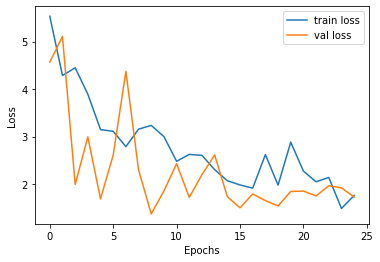

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.savefig('LossVal_loss') ##plot for loss function

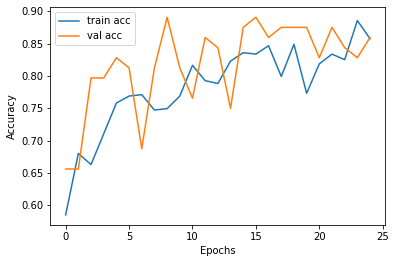

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc') ##plot for accuracy

Model 2 : Optimizer 'SGD', Learning rate '0.05'

In [ ]:
model2 = Sequential()
for layer in vgg_model.layers[:-1]:
    model2.add(layer)    ##adding all the layers of pre-trained model to the sequential model

In [ ]:
for layer in model2.layers:
    layer.trainable = False ##freezing all the layers to retain the weight

In [ ]:
model2.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.05)
model2.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##SGD optimizer with learning rate 0.05

In [ ]:
history2 = model2.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##model training and vaildation

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
15/15 [==============================] - 217s 14s/step - loss: 6.0954 - accuracy: 0.5702 - val_loss: 7.2060 - val_accuracy: 0.5156
Epoch 2/25
15/15 [==============================] - 4s 299ms/step - loss: 6.4317 - accuracy: 0.5767 - val_loss: 6.7827 - val_accuracy: 0.5469
Epoch 3/25
15/15 [==============================] - 4s 299ms/step - loss: 7.0491 - accuracy: 0.5054 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 4/25
15/15 [==============================] - 5s 301ms/step - loss: 8.7120 - accuracy: 0.4320 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 5/25
15/15 [==============================] - 5s 301ms/step - loss: 8.7120 - accuracy: 0.4320 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 6/25
15/15 [==============================] - 4s 300ms/step - loss: 8.7120 - accuracy: 0.4320 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 7/25
15/15 [==============================] - 5s 302ms/step - loss

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history2.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history2.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history2.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history2.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.45
Avg Validation Accuracy: 0.50
Avg Training Loss: 8.45
Avg Validation Loss: 7.61


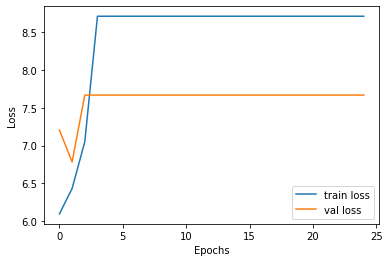

In [ ]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plot for loss function

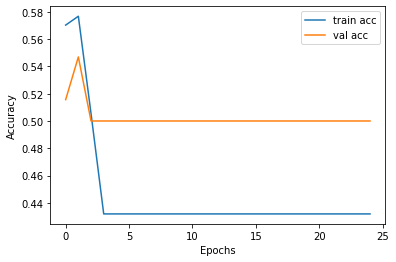

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.savefig('AccVal_acc') ##plot for accuracy

Model 3 : Optimizer 'SGD', Learning rate '0.01'

In [ ]:
model3 = Sequential()
for layer in vgg_model.layers[:-1]:
    model3.add(layer) ##adding all the layers of pre-trained to the sequential model

In [ ]:
for layer in model3.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model3.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model3.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] ##SGD optimizer with rate 0.01
)

In [ ]:
history3 = model3.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 291ms/step - loss: 3.8977 - accuracy: 0.5616 - val_loss: 6.1715 - val_accuracy: 0.5312
Epoch 2/25
15/15 [==============================] - 4s 268ms/step - loss: 2.7098 - accuracy: 0.6847 - val_loss: 0.7862 - val_accuracy: 0.7344
Epoch 3/25
15/15 [==============================] - 4s 268ms/step - loss: 1.8974 - accuracy: 0.7300 - val_loss: 0.7046 - val_accuracy: 0.8125
Epoch 4/25
15/15 [==============================] - 4s 266ms/step - loss: 1.7881 - accuracy: 0.7365 - val_loss: 2.9031 - val_accuracy: 0.6406
Epoch 5/25
15/15 [==============================] - 4s 267ms/step - loss: 2.3666 - accuracy: 0.6868 - val_loss: 0.8464 - val_accuracy: 0.8594
Epoch 6/25
15/15 [==============================] - 4s 269ms/step - loss: 0.7769 - accuracy: 0.8294 - val_loss: 0.7122 - val_accuracy: 0.8594
Epoch 7/25
15/15 [==============================] - 4s 273ms/step - loss: 2.3090 - accuracy: 0.6933 - val_loss: 1.2506 - val_accuracy: 0.8281
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history3.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history3.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history3.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history3.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.79
Avg Validation Accuracy: 0.79
Avg Training Loss: 1.30
Avg Validation Loss: 1.25


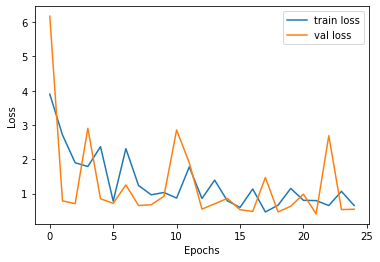

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss') ##plotting loss functions

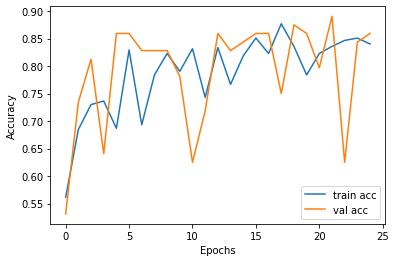

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.savefig('AccVal_acc') ##plotting accuracy

Model 4 Optimizer 'SGD', Learning rate '0.005'



In [ ]:
model4 = Sequential()
for layer in vgg_model.layers[:-1]:
    model4.add(layer)  ##adding all the layers of pre-trained model to the sequential model

In [ ]:
for layer in model4.layers:
    layer.trainable = False ##freezing all the layers to retain weight

In [ ]:
model4.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with 'softmax' activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.005)
model4.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##SGD optimizer with learning rate 0.005

In [ ]:
history4 = model4.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 292ms/step - loss: 2.9124 - accuracy: 0.4903 - val_loss: 1.8890 - val_accuracy: 0.6719
Epoch 2/25
15/15 [==============================] - 4s 267ms/step - loss: 1.1827 - accuracy: 0.7127 - val_loss: 0.6078 - val_accuracy: 0.7344
Epoch 3/25
15/15 [==============================] - 4s 270ms/step - loss: 1.6443 - accuracy: 0.6760 - val_loss: 0.5763 - val_accuracy: 0.8594
Epoch 4/25
15/15 [==============================] - 4s 270ms/step - loss: 0.8914 - accuracy: 0.7430 - val_loss: 2.8323 - val_accuracy: 0.6250
Epoch 5/25
15/15 [==============================] - 4s 271ms/step - loss: 1.0097 - accuracy: 0.7689 - val_loss: 1.2761 - val_accuracy: 0.7188
Epoch 6/25
15/15 [==============================] - 4s 266ms/step - loss: 1.1512 - accuracy: 0.7279 - val_loss: 0.4817 - val_accuracy: 0.8594
Epoch 7/25
15/15 [==============================] - 4s 270ms/step - loss: 0.8499 - accuracy: 0.7819 - val_loss: 0.4602 - val_accuracy: 0.8594
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history4.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history4.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history4.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history4.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.81
Avg Validation Accuracy: 0.81
Avg Training Loss: 0.73
Avg Validation Loss: 0.72


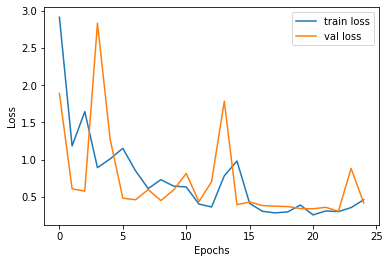

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss') ##plotting loss function

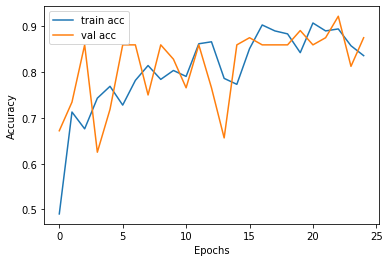

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 5 Optimizer 'SGD', Learning rate '0.001'

In [ ]:
model5 = Sequential()
for layer in vgg_model.layers[:-1]:
    model5.add(layer) ## loading all the layers of pre-trained model to sequential model

In [ ]:
for layer in model5.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model5.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding fully connected dense layer with 'softmax' activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model5.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ## SGD optimizer with learning rate 0.001

In [ ]:
history5 = model5.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 297ms/step - loss: 1.7666 - accuracy: 0.5205 - val_loss: 1.6459 - val_accuracy: 0.5625
Epoch 2/25
15/15 [==============================] - 4s 268ms/step - loss: 1.3466 - accuracy: 0.5940 - val_loss: 1.2017 - val_accuracy: 0.6406
Epoch 3/25
15/15 [==============================] - 4s 266ms/step - loss: 1.0809 - accuracy: 0.6523 - val_loss: 1.0301 - val_accuracy: 0.7031
Epoch 4/25
15/15 [==============================] - 4s 271ms/step - loss: 0.9087 - accuracy: 0.6998 - val_loss: 0.8004 - val_accuracy: 0.7188
Epoch 5/25
15/15 [==============================] - 4s 269ms/step - loss: 0.8206 - accuracy: 0.6955 - val_loss: 0.7252 - val_accuracy: 0.7188
Epoch 6/25
15/15 [==============================] - 4s 280ms/step - loss: 0.7489 - accuracy: 0.7106 - val_loss: 0.6597 - val_accuracy: 0.7344
Epoch 7/25
15/15 [==============================] - 4s 269ms/step - loss: 0.6985 - accuracy: 0.7235 - val_loss: 0.6087 - val_accuracy: 0.7344
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history5.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history5.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history5.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history5.history['val_loss']))) #performance metrics

Avg Training Accuracy: 0.75
Avg Validation Accuracy: 0.78
Avg Training Loss: 0.68
Avg Validation Loss: 0.62


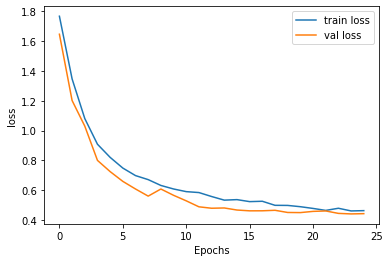

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history5.history['loss'], label='train loss')
plt.plot(history5.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot()
plt.legend()
plt.show()
plt.savefig('LossVal_loss') ##plotting loss function

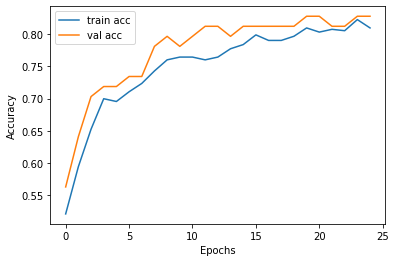

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history5.history['accuracy'], label='train acc')
plt.plot(history5.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc') ##plotting accuracy

Model 6 Optimizer 'SGD', Learning rate '0.0005'

In [ ]:
model6 = Sequential()
for layer in vgg_model.layers[:-1]:
    model6.add(layer) ##loading all layers of the pre-trained model to sequential model

In [ ]:
for layer in model6.layers:
    layer.trainable = False ##freezing all the layers to retain the weights

In [ ]:
model6.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with 'softmax' activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.0005)
model6.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##SGD optimizer with learning rate 0.0005

In [ ]:
history6 = model6.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 293ms/step - loss: 1.8840 - accuracy: 0.4860 - val_loss: 2.0088 - val_accuracy: 0.5469
Epoch 2/25
15/15 [==============================] - 4s 270ms/step - loss: 1.6188 - accuracy: 0.5529 - val_loss: 1.6508 - val_accuracy: 0.5625
Epoch 3/25
15/15 [==============================] - 4s 273ms/step - loss: 1.3867 - accuracy: 0.5853 - val_loss: 1.3996 - val_accuracy: 0.5938
Epoch 4/25
15/15 [==============================] - 4s 274ms/step - loss: 1.2297 - accuracy: 0.6026 - val_loss: 1.2341 - val_accuracy: 0.6250
Epoch 5/25
15/15 [==============================] - 4s 271ms/step - loss: 1.1113 - accuracy: 0.6393 - val_loss: 1.1290 - val_accuracy: 0.6719
Epoch 6/25
15/15 [==============================] - 4s 273ms/step - loss: 1.0074 - accuracy: 0.6544 - val_loss: 1.0557 - val_accuracy: 0.7031
Epoch 7/25
15/15 [==============================] - 4s 275ms/step - loss: 0.9479 - accuracy: 0.6695 - val_loss: 0.9381 - val_accuracy: 0.7031
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history6.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history6.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history6.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history6.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.70
Avg Validation Accuracy: 0.72
Avg Training Loss: 0.85
Avg Validation Loss: 0.80


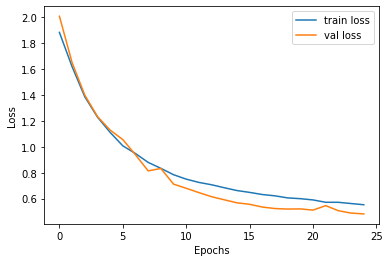

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot() ##plotting loss function
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

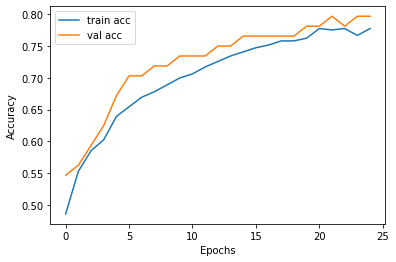

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 7 Optimizer 'SGD', Learning rate '0.0001'

In [ ]:
model7 = Sequential()
for layer in vgg_model.layers[:-1]:
    model7.add(layer) ##loading all the layers ofthe pre-trained model to sequential model

In [ ]:
for layer in model7.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model7.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with the 'softmax' activation

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.0001)
model7.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##SGD with learning rate 0.0001

In [ ]:
history7 = model7.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 296ms/step - loss: 1.9918 - accuracy: 0.4795 - val_loss: 2.2364 - val_accuracy: 0.4844
Epoch 2/25
15/15 [==============================] - 4s 269ms/step - loss: 1.9245 - accuracy: 0.4903 - val_loss: 2.1671 - val_accuracy: 0.4844
Epoch 3/25
15/15 [==============================] - 4s 271ms/step - loss: 1.8610 - accuracy: 0.4968 - val_loss: 2.1050 - val_accuracy: 0.5000
Epoch 4/25
15/15 [==============================] - 4s 272ms/step - loss: 1.8020 - accuracy: 0.5162 - val_loss: 2.0349 - val_accuracy: 0.5000
Epoch 5/25
15/15 [==============================] - 4s 280ms/step - loss: 1.7447 - accuracy: 0.5292 - val_loss: 1.9560 - val_accuracy: 0.5156
Epoch 6/25
15/15 [==============================] - 4s 267ms/step - loss: 1.6926 - accuracy: 0.5378 - val_loss: 1.8858 - val_accuracy: 0.5156
Epoch 7/25
15/15 [==============================] - 4s 271ms/step - loss: 1.6381 - accuracy: 0.5335 - val_loss: 1.8345 - val_accuracy: 0.5469
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history7.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history7.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history7.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history7.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.58
Avg Validation Accuracy: 0.57
Avg Training Loss: 1.43
Avg Validation Loss: 1.57


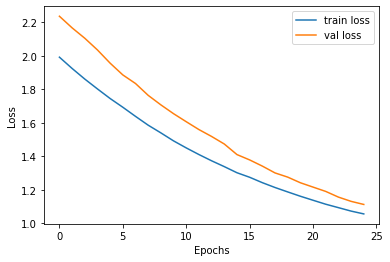

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history7.history['loss'], label='train loss')
plt.plot(history7.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss function
plt.savefig('LossVal_loss')

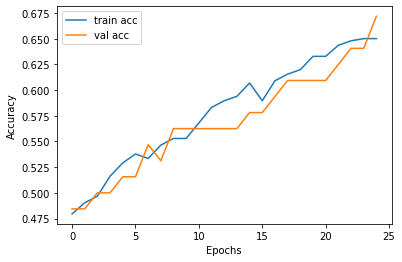

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history7.history['accuracy'], label='train acc')
plt.plot(history7.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

## Optimizer 'Adadelta'

Model 8 Optimizer 'Adadelta', Learning rate '0.1'

In [ ]:
model8 = Sequential()
for layer in vgg_model.layers[:-1]:
    model8.add(layer) ##loading all the layers of pre-trained model into the sequential model

In [ ]:
for layer in model8.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model8.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.1)
model8.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy']  ##Adadelta optimizer with 0.1
)

In [ ]:
history8 = model8.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 292ms/step - loss: 1.8444 - accuracy: 0.5011 - val_loss: 1.8019 - val_accuracy: 0.5156
Epoch 2/25
15/15 [==============================] - 4s 267ms/step - loss: 1.5065 - accuracy: 0.5486 - val_loss: 1.5408 - val_accuracy: 0.5625
Epoch 3/25
15/15 [==============================] - 4s 279ms/step - loss: 1.2762 - accuracy: 0.6026 - val_loss: 1.2385 - val_accuracy: 0.6250
Epoch 4/25
15/15 [==============================] - 4s 269ms/step - loss: 1.1081 - accuracy: 0.6415 - val_loss: 1.0576 - val_accuracy: 0.6562
Epoch 5/25
15/15 [==============================] - 4s 271ms/step - loss: 0.9876 - accuracy: 0.6631 - val_loss: 0.9775 - val_accuracy: 0.7031
Epoch 6/25
15/15 [==============================] - 4s 265ms/step - loss: 0.8970 - accuracy: 0.6803 - val_loss: 0.8181 - val_accuracy: 0.7031
Epoch 7/25
15/15 [==============================] - 4s 276ms/step - loss: 0.8242 - accuracy: 0.7041 - val_loss: 0.7724 - val_accuracy: 0.7031
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history8.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history8.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history8.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history8.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.74
Avg Validation Accuracy: 0.75
Avg Training Loss: 0.74
Avg Validation Loss: 0.69


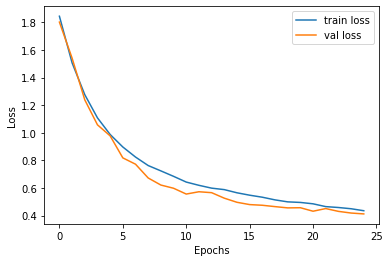

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history8.history['loss'], label='train loss')
plt.plot(history8.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss function
plt.savefig('LossVal_loss')

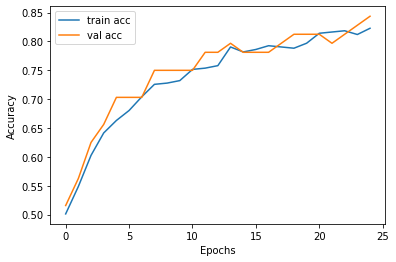

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history8.history['accuracy'], label='train acc')
plt.plot(history8.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 9 Optimizer 'Adadelta', Learning rate '0.05'

In [ ]:
model9 = Sequential()
for layer in vgg_model.layers[:-1]:
    model9.add(layer) ##loading all the layers of pre-train

In [ ]:
for layer in model9.layers:
    layer.trainable = False ##freezing all the layers to retain weight

In [ ]:
model9.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros()))

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.05)
model9.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##Adadelta optimizer with learning rate 0.05

In [ ]:
history9 = model9.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 293ms/step - loss: 1.9547 - accuracy: 0.4816 - val_loss: 2.1426 - val_accuracy: 0.5000
Epoch 2/25
15/15 [==============================] - 4s 272ms/step - loss: 1.7907 - accuracy: 0.5140 - val_loss: 1.9601 - val_accuracy: 0.5156
Epoch 3/25
15/15 [==============================] - 4s 271ms/step - loss: 1.6424 - accuracy: 0.5335 - val_loss: 1.7541 - val_accuracy: 0.5312
Epoch 4/25
15/15 [==============================] - 4s 273ms/step - loss: 1.5109 - accuracy: 0.5529 - val_loss: 1.6248 - val_accuracy: 0.5625
Epoch 5/25
15/15 [==============================] - 4s 268ms/step - loss: 1.3975 - accuracy: 0.5832 - val_loss: 1.4948 - val_accuracy: 0.5625
Epoch 6/25
15/15 [==============================] - 4s 272ms/step - loss: 1.3036 - accuracy: 0.6048 - val_loss: 1.3758 - val_accuracy: 0.5781
Epoch 7/25
15/15 [==============================] - 4s 275ms/step - loss: 1.2193 - accuracy: 0.6242 - val_loss: 1.2532 - val_accuracy: 0.6094
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history9.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history9.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history9.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history9.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.66
Avg Validation Accuracy: 0.68
Avg Training Loss: 1.02
Avg Validation Loss: 1.01


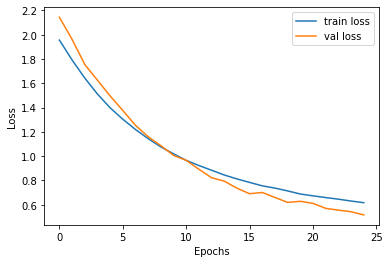

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history9.history['loss'], label='train loss')
plt.plot(history9.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot() ##plotting loss function
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

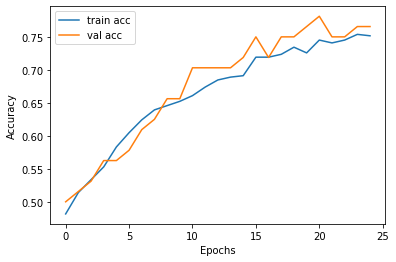

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history9.history['accuracy'], label='train acc')
plt.plot(history9.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 10 Optimizer 'Adadelta', Learning rate '0.01'

In [ ]:
model10 = Sequential()
for layer in vgg_model.layers[:-1]:
    model10.add(layer) ##loading all the layers of the pre-trained model to the sequential model

In [ ]:
for layer in model10.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model10.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.01)
model10.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##Adadelta with learning rate 0.01

In [ ]:
history10 = model10.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 292ms/step - loss: 2.0074 - accuracy: 0.4816 - val_loss: 2.2641 - val_accuracy: 0.4688
Epoch 2/25
15/15 [==============================] - 4s 269ms/step - loss: 1.9682 - accuracy: 0.4860 - val_loss: 2.2267 - val_accuracy: 0.4844
Epoch 3/25
15/15 [==============================] - 4s 270ms/step - loss: 1.9319 - accuracy: 0.4946 - val_loss: 2.1925 - val_accuracy: 0.4844
Epoch 4/25
15/15 [==============================] - 4s 269ms/step - loss: 1.8975 - accuracy: 0.4946 - val_loss: 2.1603 - val_accuracy: 0.5000
Epoch 5/25
15/15 [==============================] - 4s 270ms/step - loss: 1.8647 - accuracy: 0.4946 - val_loss: 2.1218 - val_accuracy: 0.5000
Epoch 6/25
15/15 [==============================] - 4s 270ms/step - loss: 1.8324 - accuracy: 0.5054 - val_loss: 2.0858 - val_accuracy: 0.5156
Epoch 7/25
15/15 [==============================] - 4s 269ms/step - loss: 1.7994 - accuracy: 0.5097 - val_loss: 2.0477 - val_accuracy: 0.5156
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history10.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history10.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history10.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history10.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.54
Avg Validation Accuracy: 0.53
Avg Training Loss: 1.63
Avg Validation Loss: 1.84


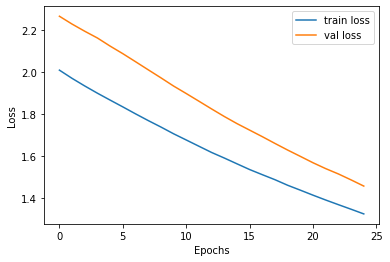

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history10.history['loss'], label='train loss')
plt.plot(history10.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss function
plt.savefig('LossVal_loss')

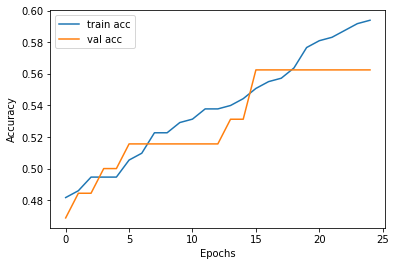

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history10.history['accuracy'], label='train acc')
plt.plot(history10.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 11 Optimizer 'Adadelta', Learning rate '0.005'

In [ ]:
model11 = Sequential()
for layer in vgg_model.layers[:-1]:
    model11.add(layer) ##loading all the layers of the pre-trained model to the sequential model

In [ ]:
for layer in model11.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model11.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.005)
model11.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##Adadelta optimizer with learning rate 0.005

In [ ]:
history11 = model11.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 294ms/step - loss: 2.0107 - accuracy: 0.4795 - val_loss: 2.2800 - val_accuracy: 0.4688
Epoch 2/25
15/15 [==============================] - 4s 271ms/step - loss: 1.9877 - accuracy: 0.4838 - val_loss: 2.2580 - val_accuracy: 0.4688
Epoch 3/25
15/15 [==============================] - 4s 272ms/step - loss: 1.9657 - accuracy: 0.4903 - val_loss: 2.2373 - val_accuracy: 0.4844
Epoch 4/25
15/15 [==============================] - 4s 269ms/step - loss: 1.9452 - accuracy: 0.4924 - val_loss: 2.2149 - val_accuracy: 0.4844
Epoch 5/25
15/15 [==============================] - 4s 268ms/step - loss: 1.9243 - accuracy: 0.4924 - val_loss: 2.1915 - val_accuracy: 0.4844
Epoch 6/25
15/15 [==============================] - 4s 271ms/step - loss: 1.9036 - accuracy: 0.4946 - val_loss: 2.1687 - val_accuracy: 0.4844
Epoch 7/25
15/15 [==============================] - 4s 275ms/step - loss: 1.8833 - accuracy: 0.4946 - val_loss: 2.1468 - val_accuracy: 0.4844
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history11.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history11.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history11.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history11.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.51
Avg Validation Accuracy: 0.51
Avg Training Loss: 1.78
Avg Validation Loss: 2.02


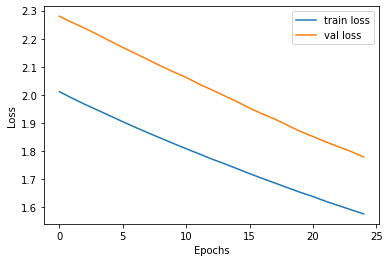

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history11.history['loss'], label='train loss')
plt.plot(history11.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss functions
plt.savefig('LossVal_loss')

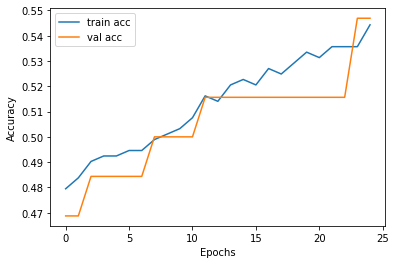

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history11.history['accuracy'], label='train acc')
plt.plot(history11.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 12 Optimizer 'Adadelta', Learning rate '0.001'

In [ ]:
model12 = Sequential()
for layer in vgg_model.layers[:-1]:
    model12.add(layer) ##adding all the layers from the pre-trained model to the sequential model

In [ ]:
for layer in model12.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model12.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.001)
model12.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##adadelta with learning rate 0.001

In [ ]:
history12 = model12.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 297ms/step - loss: 2.0191 - accuracy: 0.4773 - val_loss: 2.2962 - val_accuracy: 0.4688
Epoch 2/25
15/15 [==============================] - 4s 272ms/step - loss: 2.0147 - accuracy: 0.4773 - val_loss: 2.2929 - val_accuracy: 0.4688
Epoch 3/25
15/15 [==============================] - 4s 269ms/step - loss: 2.0101 - accuracy: 0.4773 - val_loss: 2.2889 - val_accuracy: 0.4688
Epoch 4/25
15/15 [==============================] - 4s 270ms/step - loss: 2.0058 - accuracy: 0.4773 - val_loss: 2.2848 - val_accuracy: 0.4688
Epoch 5/25
15/15 [==============================] - 4s 271ms/step - loss: 2.0015 - accuracy: 0.4773 - val_loss: 2.2813 - val_accuracy: 0.4688
Epoch 6/25
15/15 [==============================] - 4s 271ms/step - loss: 1.9972 - accuracy: 0.4838 - val_loss: 2.2773 - val_accuracy: 0.4688
Epoch 7/25
15/15 [==============================] - 4s 269ms/step - loss: 1.9931 - accuracy: 0.4838 - val_loss: 2.2735 - val_accuracy: 0.4688
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history12.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history12.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history12.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history12.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.49
Avg Validation Accuracy: 0.48
Avg Training Loss: 1.97
Avg Validation Loss: 2.25


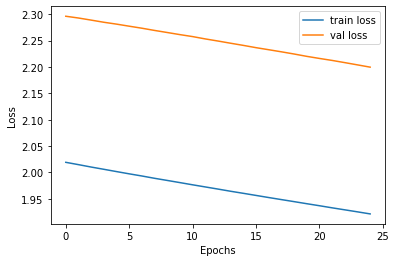

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history12.history['loss'], label='train loss')
plt.plot(history12.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss functions
plt.savefig('LossVal_loss')

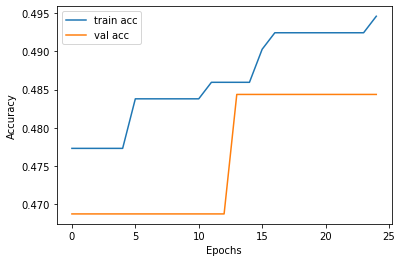

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history12.history['accuracy'], label='train acc')
plt.plot(history12.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 13 Optimizer 'Adadelta', Learning rate '0.0005'

In [ ]:
model13 = Sequential()
for layer in vgg_model.layers[:-1]:
    model13.add(layer) ##loading all the layers of the pre-trained model into the sequential model

In [ ]:
for layer in model13.layers:
    layer.trainable = False ##freezing all the layers to retain weights

In [ ]:
model13.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.0005)
model13.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy'] 
) ##Adadelta with learning rate 0.0005

In [ ]:
history13 = model13.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 295ms/step - loss: 2.0199 - accuracy: 0.4773 - val_loss: 2.2980 - val_accuracy: 0.4688
Epoch 2/25
15/15 [==============================] - 4s 269ms/step - loss: 2.0175 - accuracy: 0.4773 - val_loss: 2.2961 - val_accuracy: 0.4688
Epoch 3/25
15/15 [==============================] - 4s 267ms/step - loss: 2.0152 - accuracy: 0.4773 - val_loss: 2.2943 - val_accuracy: 0.4688
Epoch 4/25
15/15 [==============================] - 4s 269ms/step - loss: 2.0129 - accuracy: 0.4773 - val_loss: 2.2923 - val_accuracy: 0.4688
Epoch 5/25
15/15 [==============================] - 4s 287ms/step - loss: 2.0105 - accuracy: 0.4773 - val_loss: 2.2905 - val_accuracy: 0.4688
Epoch 6/25
15/15 [==============================] - 4s 281ms/step - loss: 2.0082 - accuracy: 0.4773 - val_loss: 2.2885 - val_accuracy: 0.4688
Epoch 7/25
15/15 [==============================] - 4s 279ms/step - loss: 2.0060 - accuracy: 0.4773 - val_loss: 2.2864 - val_accuracy: 0.4688
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history13.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history13.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history13.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history13.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.48
Avg Validation Accuracy: 0.47
Avg Training Loss: 1.99
Avg Validation Loss: 2.27


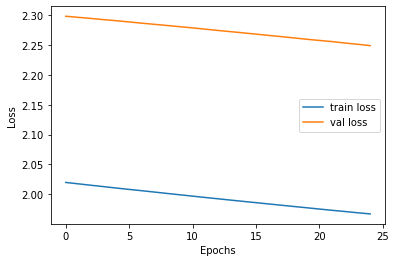

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history13.history['loss'], label='train loss')
plt.plot(history13.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss function
plt.savefig('LossVal_loss')

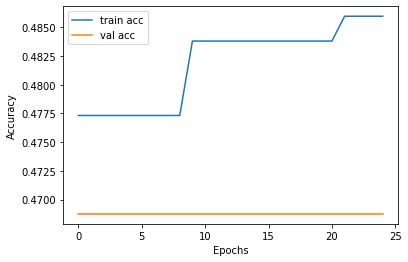

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history13.history['accuracy'], label='train acc')
plt.plot(history13.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')

Model 14 Optimizer 'Adadelta', Learning rate '0.0001'

In [ ]:
model14 = Sequential()
for layer in vgg_model.layers[:-1]:
    model14.add(layer) ##loading all the layers of the pre-trained model into the sequential model

In [ ]:
for layer in model14.layers:
    layer.trainable = False ##freezing all the layers to retain the weights

In [ ]:
model14.add(Dense(2, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1, seed=0), bias_initializer=initializers.Zeros())) ##adding a fully connected dense layer with softmax activation

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.0001)
model14.compile(
  loss='binary_crossentropy',
  optimizer= opt,
  metrics=['accuracy']  
) ##Adadelta with learning rate 0.0001

In [ ]:
history14 = model14.fit_generator(training_set,
                        epochs = 25,
                        validation_data=val_set,
                        shuffle = True) ##training and validation

Epoch 1/25
15/15 [==============================] - 4s 293ms/step - loss: 2.0207 - accuracy: 0.4773 - val_loss: 2.2996 - val_accuracy: 0.4688
Epoch 2/25
15/15 [==============================] - 4s 267ms/step - loss: 2.0203 - accuracy: 0.4773 - val_loss: 2.2992 - val_accuracy: 0.4688
Epoch 3/25
15/15 [==============================] - 4s 271ms/step - loss: 2.0198 - accuracy: 0.4773 - val_loss: 2.2987 - val_accuracy: 0.4688
Epoch 4/25
15/15 [==============================] - 4s 271ms/step - loss: 2.0193 - accuracy: 0.4773 - val_loss: 2.2982 - val_accuracy: 0.4688
Epoch 5/25
15/15 [==============================] - 4s 275ms/step - loss: 2.0189 - accuracy: 0.4773 - val_loss: 2.2978 - val_accuracy: 0.4688
Epoch 6/25
15/15 [==============================] - 4s 270ms/step - loss: 2.0185 - accuracy: 0.4773 - val_loss: 2.2973 - val_accuracy: 0.4688
Epoch 7/25
15/15 [==============================] - 4s 271ms/step - loss: 2.0180 - accuracy: 0.4773 - val_loss: 2.2968 - val_accuracy: 0.4688
Epoch 

In [ ]:
print('Avg Training Accuracy: {:.2f}'.format(np.mean(history14.history['accuracy'])))
print('Avg Validation Accuracy: {:.2f}'.format(np.mean(history14.history['val_accuracy'])))
print('Avg Training Loss: {:.2f}'.format(np.mean(history14.history['loss'])))
print('Avg Validation Loss: {:.2f}'.format(np.mean(history14.history['val_loss']))) ##performance metrics

Avg Training Accuracy: 0.48
Avg Validation Accuracy: 0.47
Avg Training Loss: 2.02
Avg Validation Loss: 2.29


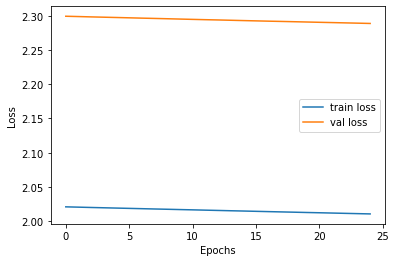

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history14.history['loss'], label='train loss')
plt.plot(history14.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()
plt.legend()
plt.show() ##plotting loss function
plt.savefig('LossVal_loss')

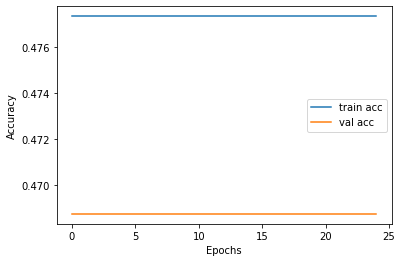

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history14.history['accuracy'], label='train acc')
plt.plot(history14.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() ##plotting accuracy
plt.savefig('AccVal_acc')